In [57]:
import functions
import matplotlib.pyplot as plt
import numpy as np

In [6]:
from ultralytics import FastSAM
from ultralytics.models.fastsam import FastSAMPrompt

In [36]:
total_df = functions.get_image_df()
total_df.head()

,Animal ID,Animal Date,Image ID,Image File,x_coord,y_coord,wbc_class,set
0,18Z,2015-11-18,55725659,A014_18Z_T15092_MID_x40_z0_i01j06.jpg,183,183,N,Set4
1,18Z,2015-11-18,55726671,A014_18Z_T15092_MID_x40_z0_i01j29.jpg,553,881,L,Set4
2,18Z,2015-11-18,55727023,A014_18Z_T15092_MID_x40_z0_i01j37.jpg,132,848,M,Set4
3,18Z,2015-11-18,55727111,A014_18Z_T15092_MID_x40_z0_i01j39.jpg,278,372,E,Set4
4,18Z,2015-11-18,55727199,A014_18Z_T15092_MID_x40_z0_i01j41.jpg,821,391,N,Set4


In [38]:
total_df[total_df['wbc_class'] =='L']

,Animal ID,Animal Date,Image ID,Image File,x_coord,y_coord,wbc_class,set
1,18Z,2015-11-18,55726671,A014_18Z_T15092_MID_x40_z0_i01j29.jpg,553,881,L,Set4
15,18Z,2015-11-18,55725841,A014_18Z_T15092_MID_x40_z0_i07j10.jpg,657,749,L,Set4
22,18Z,2015-11-18,55725623,A014_18Z_T15092_MID_x40_z0_i09j05.jpg,581,673,L,Set4
26,18Z,2015-11-18,55725931,A014_18Z_T15092_MID_x40_z0_i09j12.jpg,809,818,L,Set4
27,18Z,2015-11-18,55726239,A014_18Z_T15092_MID_x40_z0_i09j19.jpg,93,602,L,Set4
...,...,...,...,...,...,...,...,...
930,3D4,NaT,71050577,N19127_3D4_N19127_RT_x40_z0_i08j27.jpg,517,956,L,Set5
949,3D4,NaT,71050682,N19127_3D4_N19127_RT_x40_z0_i12j39.jpg,138,626,L,Set5
953,3D4,NaT,71050711,N19127_3D4_N19127_RT_x40_z0_i14j23.jpg,349,324,L,Set5
972,3D4,NaT,71050772,N19127_3D4_N19127_RT_x40_z0_i16j37.jpg,920,73,L,Set5


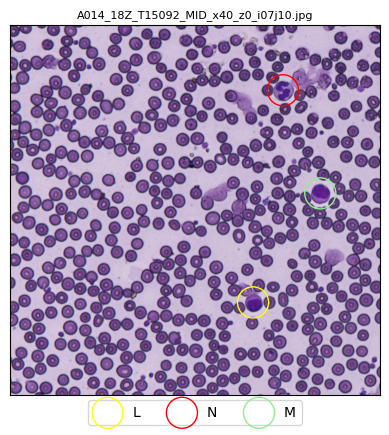

In [40]:
image_name = 'A014_18Z_T15092_MID_x40_z0_i07j10.jpg'
fig, ax = plt.subplots()
functions.plot_image_file(ax=ax, image_file_name=image_name, total_df=total_df)
plt.show()

In [41]:

total_df[total_df['Image File'] == image_name]

,Animal ID,Animal Date,Image ID,Image File,x_coord,y_coord,wbc_class,set
15,18Z,2015-11-18,55725841,A014_18Z_T15092_MID_x40_z0_i07j10.jpg,657,749,L,Set4
16,18Z,2015-11-18,55725841,A014_18Z_T15092_MID_x40_z0_i07j10.jpg,738,175,N,Set4
17,18Z,2015-11-18,55725841,A014_18Z_T15092_MID_x40_z0_i07j10.jpg,839,454,M,Set4


In [42]:
image_path = functions.get_image_path(image_file_name=image_name, total_df=total_df)
img = functions.get_image_from_path(file_path=image_path)

In [61]:
model = FastSAM('FastSAM-s.pt')  # or FastSAM-x.pt
#Run inference on an image
everything_results = model(img, device='cpu', retina_masks=True, imgsz=1024, conf=0.4, iou=0.9)
# Prepare a Prompt Process object
prompt_process = FastSAMPrompt(source=img, results=everything_results, device='cpu')
ann = prompt_process.point_prompt(points=[[657, 749], [738, 175], [839,454]], pointlabel=[1])


0: 1024x1024 300 objects, 2159.0ms
Speed: 30.9ms preprocess, 2159.0ms inference, 41161.8ms postprocess per image at shape (1, 3, 1024, 1024)


In [62]:
prompt_process.plot(annotations=ann, output='./')

Saving image0.jpg to image0.jpg: 100%|██████████| 1/1 [00:01<00:00,  1.50s/it]


In [54]:
for result in ann:
    
    data = result.masks.data
    print(data.shape)

torch.Size([1, 1000, 1000])


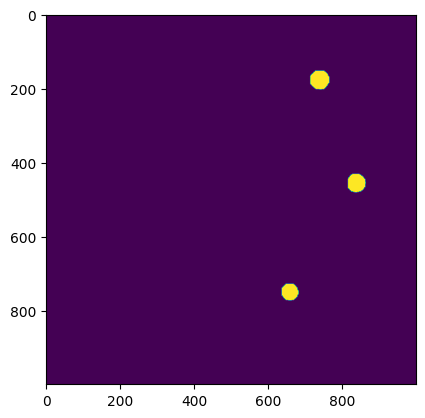

In [60]:
data = np.squeeze(data)
data * 1
plt.imshow(data)
plt.show()